# LSTM Misclassification (Manual Review)

With our LSTM networks, I took 200 samples for 1-star, 4-star, 5-star reviews that were misclassified (using Pandas sample method) and manually looked at the reviews that categorized them.

This notebook is broken down into 2 sections:
* first section is a [summary of misclassifications](#summary) for 1-star, 4-star, and 5-star reviews with graphs
* examples of each common misclassification categories for [1-star](#1-star), [4-star](#4-star), and [5-star](#5-star)


## Common Miscategorizations

(proportion of misclassification is ordered below - ie, 3-star, 2-star means most misclassified as 3-star then 2-star)

* 1-star reviews
    * [negative only](#negative_only1) misclassified as 3-star, 2-star, then 5-star
    * [has positives](#has_positive1) misclassified as 3-star, 2-star, then 5-star
* 4-star misclassified
    * [positively only](#positive_only4) misclassified as 5-star
    * [has negative](#has_negative4) misclassified as 5-star then 1-star
* 5-star misclassified as 4-stars or 3-stars
    * [positive only](#positive_only5) misclassified as 4-star
    * [has negative](#has_negative5) misclassified as 4-star, 3-star, then 1-star

## Explanation of Columns
| Name | Description |
|-----|--------------|
| index_orig | original index from the data file |
| true_all | Truth label |
| predict_15 | prediction from LSTM when only 1-star and 5-star reviews were trained |
| predict_145 | prediction from LSTM when only 1-star, 4-star, and 5-star reviews were trained |
| predict_1345 | prediction from LSTM when only 1-star, 3-star, 4-star, and 5-star reviews were trained |
| predict_all | prediction from LSTM when all star reviews were trained |
| review_body | original review body |
| out_of_vocab | list of words that were not in the gLove vocabulary - these would have been converted to 0 vectors as input into the model |
| review_body_train | review_body - out_of_vocab - final input into the model |
| misclassification_category | manual category by me |
| notes | any special notes about that review |

In [1]:
# import sibling utilities
import sys
sys.path.append('../')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.5)
pd.set_option("max_colwidth", 500)

RANDOM_STATE = 1
SAMPLES = 10
DISPLAY_COLS = ["index_orig", "true_all", "predict_15", "predict_145", "predict_1345", "predict_all", 
               "review_body_train", "notes"]

/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
REPORT_FILE = '../reports/lstm-misclassified-reviewed.xls'

report1 = pd.read_excel(REPORT_FILE, sheet_name="1-star")
report4 = pd.read_excel(REPORT_FILE, sheet_name="4-star")
report5 = pd.read_excel(REPORT_FILE, sheet_name="5-star")

<div id="summary" />

# Misclassification Summary

| category | description |
|----------|-------------|
| has_positive | used for 1-star reviews. review has some type of positive/neutral words regarding production - ie, it worked |
| has_negative | used for 4-star and 5-star reviews. review has both positive and negative context |
| positive_only | review only has positive sentiment |
| update | used only for 4-star reviews. some reviews have been amended with an update at the end - ie, product worked initially but then user found out something later that made them change the review. There is no attribute in the review except the word 'update:' that indicates this |
| mistake | in one case I found that in the review body, the text said the user rated the product 3.5 stars but the review star rating was 1 |
| ? | did not understand review |
| truncated | when training the model, we truncate the review at 100 words to keep our feature small. 90% of reviews are 100 words or less. In some cases, the review is really long and does not capture the entire sentiment of the review |
| invalid | generally the review is in a foreign language |
| neutral | review didn't have negative or neutral words - ie, gave one to family and meets expectation |




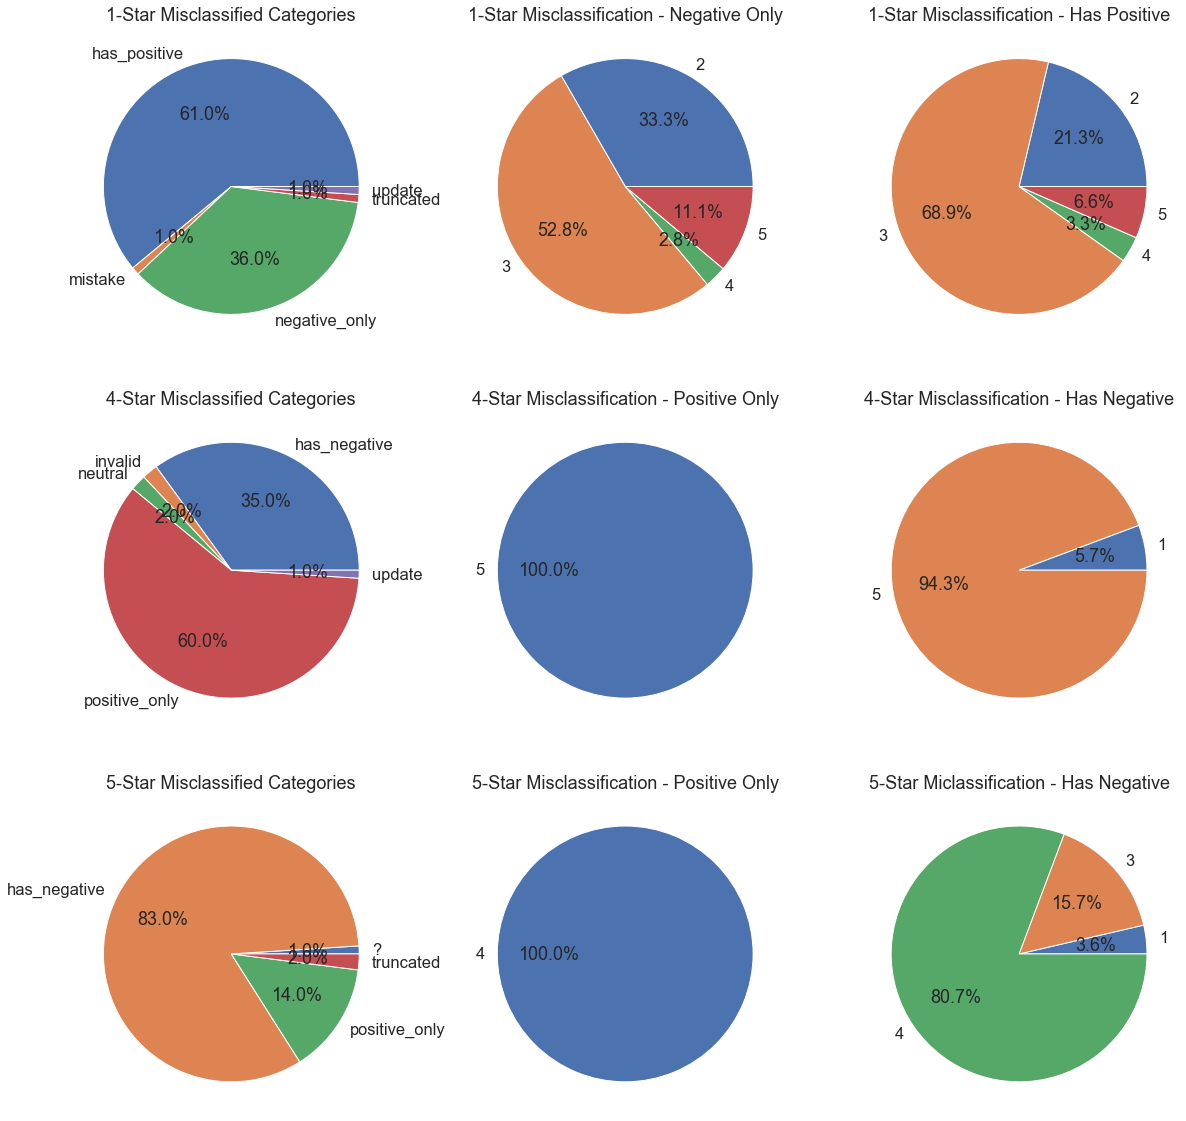

In [3]:
# 1-star reviews
report1_grouped = report1[["misclassification_category", "review_body_train"]].groupby("misclassification_category").count(). \
                        rename({"review_body_train": "total"}, axis=1).reset_index()
report1_grouped["percentage"] = report1_grouped.total / report1_grouped.total.sum()

# negative only
negative_only1 = report1[report1.misclassification_category == "negative_only"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
negative_only1["percentage"] = negative_only1.total / negative_only1.total.sum()

# has_positive
has_positive1 = report1[report1.misclassification_category == "has_positive"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
has_positive1["percentage"] = has_positive1.total / has_positive1.total.sum()


f, a = plt.subplots(3, 3, figsize=(20, 20))
_ = a[0][0].pie(report1_grouped.percentage, labels=report1_grouped.misclassification_category, autopct='%1.1f%%')
_ = a[0][0].set_title("1-Star Misclassified Categories")

_ = a[0][1].pie(negative_only1.percentage, labels=negative_only1.prediction, autopct='%1.1f%%')
_ = a[0][1].set_title("1-Star Misclassification - Negative Only")

_ = a[0][2].pie(has_positive1.percentage, labels=has_positive1.prediction, autopct='%1.1f%%')
_ = a[0][2].set_title("1-Star Misclassification - Has Positive")

# 4-star reviews
report4_grouped = report4[["misclassification_category", "review_body_train"]].groupby("misclassification_category").count(). \
                        rename({"review_body_train": "total"}, axis=1).reset_index()
report4_grouped["percentage"] = report4_grouped.total / report4_grouped.total.sum()

# positive only
positive_only4 = report4[report4.misclassification_category == "positive_only"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
positive_only4["percentage"] = positive_only4.total / positive_only4.total.sum()

# has negative
has_negative4 = report4[report4.misclassification_category == "has_negative"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
has_negative4["percentage"] = has_negative4.total / has_negative4.total.sum()



_ = a[1][0].pie(report4_grouped.percentage, labels=report4_grouped.misclassification_category, autopct='%1.1f%%')
_ = a[1][0].set_title("4-Star Misclassified Categories")

_ = a[1][1].pie(positive_only4.percentage, labels=positive_only4.prediction, autopct='%1.1f%%')
_ = a[1][1].set_title("4-Star Misclassification - Positive Only")

_ = a[1][2].pie(has_negative4.percentage, labels=has_negative4.prediction, autopct='%1.1f%%')
_ = a[1][2].set_title("4-Star Misclassification - Has Negative")

# 5-star
report5_grouped = report5[["misclassification_category", "review_body_train"]].groupby("misclassification_category").count(). \
                        rename({"review_body_train": "total"}, axis=1).reset_index()
report5_grouped["percentage"] = report5_grouped.total / report5_grouped.total.sum()

# positive only
positive_only5 = report5[report5.misclassification_category == "positive_only"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
positive_only5["percentage"] = positive_only5.total / positive_only5.total.sum()

# has negative
has_negative5 = report5[report5.misclassification_category == "has_negative"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
has_negative5["percentage"] = has_negative5.total / positive_only5.total.sum()

_ = a[2][0].pie(report5_grouped.percentage, labels=report5_grouped.misclassification_category, autopct='%1.1f%%')
_ = a[2][0].set_title("5-Star Misclassified Categories")

_ = a[2][1].pie(positive_only5.percentage, labels=positive_only5.prediction, autopct='%1.1f%%')
_ = a[2][1].set_title("5-Star Misclassification - Positive Only")

_ = a[2][2].pie(has_negative5.percentage, labels=has_negative5.prediction, autopct='%1.1f%%')
_ = a[2][2].set_title("5-Star Miclassification - Has Negative")

<div id="1-star"/>

# Misclassified 1-Star

* negatively only reviews are misclassified as 3-star, 2-star, 5-star, then 4-star
* reviews that have positive words are misclassified as 3-star, 2-star, 5-star, then 4-star

<div id="negative_only1" />

### 1-Star - Negative Only Samples

In [4]:
report1[report1.misclassification_category == "negative_only"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
76,36591,1,NaN,NaN,3,2,nearly i to get your cards out of the slot my sliding door also opens randomly because there is nothing to keep it shut so once you use it a few ti ames it no longer stays closed i use it just as a basic case now because i do not trust it enough to keep my cards in it also the volume and power buttons are extremely hard to work with while the case is on you need to push very hard,NaN
98,303033,1,NaN,NaN,3,3,these seemed at first to be the logical choice for me at the gym and running but after a few days i had to send them back they are light weight but i never could get them to stay put seems there are 2 ways to wear them the one that involves those clips i never could get to work right and when i wore them the other way they just kept falling out especially when running,NaN
73,481500,1,NaN,NaN,3,3,the design was the same but it was upside down,NaN
7,602324,1,NaN,1.0,3,3,i think it seems to be defective do something weird to my appliance when plugged in to the adapter,NaN
62,916570,1,NaN,NaN,3,5,this review is for the new style soft strap monitor not the old style hard strap add me to the list of disappointed owners of this strap it worked fine for a couple of months then crashed and burned heart rate readings bounce around from to if i get a reading at all i have changed the battery hand washed it in warm water wet it prior to riding etc and still get erratic readings i completed a cli amb a little over a 3 4 of mile long that started at 4 went up as high as and averaged,NaN
58,153640,1,NaN,NaN,3,5,too many rules i prefer something si ampler,NaN
65,645676,1,NaN,NaN,3,2,the amount of ti ame it takes to recharge a battery is like 6 hours not worth it also someti ames it indicates that the battery is charged full but when you put it in your phone the battery is not really charged its like i rarely use it,NaN
68,406532,1,NaN,NaN,3,2,not useful the cross protrudes out so far that it has to lay flat on thr face of the phone i have never used it for this reason maybe if i needed something to just hold up for a pic but no protections and not for,NaN
74,710272,1,NaN,NaN,3,3,i really liked the item the price and its looks but it did not work for me i really wanted the item,NaN
71,202618,1,NaN,NaN,3,4,my arm hairs catch between the links i barely have any arm hairs but it manages to catch the few i have,NaN


<div id="has_positive1" />

### 1-Star - Has Positives Samples

In [5]:
report1[report1.misclassification_category == "has_positive"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
59,123492,1,NaN,NaN,3,3,paint started chipping off after a couple of weeks great fit but obviously has some quality issue i see that other reviews have had the same problem they should pull this product until they fix the chipping issue,NaN
66,13867,1,NaN,NaN,3,3,it is ok but it is still kind of small on my wrist,NaN
4,717359,1,NaN,NaN,3,5,we revived the screen saver on ti ame great packaging opened it up and tried to put it on and it was not for my daughters galaxy phone,NaN
83,761248,1,NaN,NaN,3,2,so disappointed with this case i am not overly rough on my phone but it broke on the first drop on a rug it did however protect my phone so i guess it served it is purpose the case will now not close securely but i still used it for a a while my biggest complaint of this case is that the plastic on the back got very discolored with use and began to look gross within the first month i thought it was possibly from the oil on from my hands i was reaching for a reason but my,NaN
86,241320,1,NaN,NaN,3,3,i thought it was bigger but it is fine i guess,it's fine I guess
40,665988,1,NaN,NaN,3,3,the phone itself appeared to be off good quality however the battery is loose i actually have the batter taped onto the phone for it to stay powered on,NaN
50,271496,1,1.0,NaN,3,3,it worked but it doesnt completely stick to the screen it leaves an area of about 1 that doesnt stick down all the way,NaN
52,498956,1,NaN,NaN,3,2,it fit my phone just fine however the charger did not fit anymore with the case on really disappointed was really excited for this new case,NaN
63,593205,1,NaN,NaN,3,3,i received it thinking it was rubberized the case is plastic it is an okay cover however it should not be labeled as rubberized,NaN
56,93536,1,NaN,NaN,3,3,did not have it long at all it is cute but the paint on the back is chipping already i know this case will not last long,NaN


<div id="4-star"/>

# Misclssified 4-Star

* reviews that are only positive are misclassified as 5-star
* reviews that have negative words are misclassified as 5-star then 1-star

<div id="positive_only4" />

### 4-Star Positive Only Samples

In [6]:
report4[report4.misclassification_category == "positive_only"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
62,215452,4,NaN,NaN,5.0,5,i love my chevron case and colors it fits the phone well,NaN
65,358838,4,NaN,5.0,5.0,5,fast and cheap,NaN
2,449391,4,NaN,5.0,5.0,5,very good product,NaN
74,554133,4,NaN,NaN,5.0,5,my daughter wanted this cover for her phone and she loves it because she says it feels like it gives her phone more protection,NaN
79,561980,4,NaN,NaN,5.0,5,the fit is almost perfect i like the double protection on the corners of the phone i do believe this is where the phones are likely to have first i with the ground cannot beat the price,NaN
68,130710,4,NaN,NaN,5.0,5,best bang for your buck,NaN
54,157096,4,NaN,NaN,5.0,5,easy to install and easy to use an outstanding option for a inch tablet holder in vehicle,NaN
57,384848,4,NaN,5.0,NaN,5,as described would buy again,NaN
64,503859,4,NaN,NaN,5.0,5,the screen protector is easy to apply and seems very durable in addition it is easy to remove and replace should you have an issue keep in mind that you must clean the screen thoroughly or the screen may not adhere as well as expected,NaN
43,698518,4,NaN,5.0,NaN,5,after recieving a case that was cheap that is what i was expecting with this but it is great very sturdy and i get lots of compli aments on how great it looks,NaN


<div id="has_negative4" />

### 4-Star - has negatives Samples

In [7]:
report4[report4.misclassification_category == "has_negative"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
48,303939,4,NaN,5.0,NaN,5,i bought a pair of these for my back doors and the version of these for the front they do not fit right in the back but i think i will be satisfied after i get them sealed up and installed correctly definitely better than the stock speakers for the money spent well worth it i would recommend this product,NaN
61,732019,4,NaN,NaN,5.0,5,this gps reception of garmin is great the update speed is fast compared to some other navigators that my friends got the touch pad is responsive and the user interface is clear and intuitive at conjunction the instructions to turn is clear instructions are given promptly and in a concise and accurate manner the only thing that i do not really like about the garmin is its battery life although the product is light in weight the battery life is very li when not in use the battery will be gone ...,NaN
15,537428,4,NaN,5.0,NaN,5,the case is great i had to wait almost a month to get it tho when i was told up to 7 days,NaN
86,472775,4,NaN,5.0,5.0,5,i really was not sure what to expect with this but i absolutely love it now it charges my phone quickly and its so convenient the only issue i had is that i really wanted pink but it was not available when i ordered i love the flashlight luckily my phone has a wall port for charging so i connected it to that to charge it instead of to my computer but it will work either way great device,NaN
94,955572,4,NaN,NaN,5.0,5,i used garmin in australia and u s a i used tom tom in u s a and canada each have good and bad points tom tom screen will white out on you more often than garmin tom tom has more icons and permits up and downloading sharing with other drivers where safety cameras are located i like this feature so i put up with white out screens using tom tom more than my garmin,NaN
83,815251,4,NaN,5.0,NaN,5,after receiving a faulty item the snugg company got in touch with me and sent a replacement i was really i with the friendly and helpful service the new case fits my iphone 4 very snugg and looks great i really love the bamboo thanks heaps,NaN
72,24721,4,NaN,5.0,NaN,5,this is a very pretty case for my brand new iphone 6 it is beautiful but it provides absolutely no protection from drops or unfortunate accidents it is for looks and to prevent very minor scratches only fits perfectly,NaN
81,792791,4,NaN,4.0,5.0,5,nice case for the price it is my sons and he has not complained i would reorder this if i needed another,NaN
80,987206,4,NaN,5.0,5.0,5,i have been pleased with the performance of the zumo it is cheaper than the model i do not need bluetooth the only annoyance is that some of the points of interest and even road changes are out of date by perhaps a couple of years,NaN
93,45510,4,NaN,5.0,NaN,5,i am loving having my new battery for my phone so my phone does not die on me or restart also loving not having to keep my phone plugged in to make a call or to play a game on my phone the only bad thing is my phone still gets a little to warm but still better than before thank u,NaN


<div id="5-star"/>

# Misclssified 5-Star

* reviews that are positive only are misclassified as 4-star
* reviews have negative words are misclassified as 4-star, 3-star, then 1-star

<div id="has_negative5"/>

### 5-Star Reviews - Has Negative Samples

In [8]:
report5[report5.misclassification_category == "has_negative"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
10,825084,5,NaN,NaN,4.0,4,the case is just like i expected it to be good hard plastic it does not add much protection to the phone as it is mainly just for looks but if you are careful with your phone it is a good case overall besides who does not love coca cola memorabilia,NaN
89,641139,5,NaN,4.0,NaN,3,now the case case a small hole were the singal is sent the case is a little bit hard to put,NaN
53,590927,5,NaN,4.0,NaN,4,i get it for it is ok for use but right now i am not realize it is cheap but the quality is good,NaN
66,603977,5,NaN,NaN,4.0,3,well it was a nice case and i loved the bright colors but when i purchased it i thought i was getting a not a 5 so i have never used it,NaN
43,126541,5,NaN,NaN,4.0,4,works quite well for the price be aware both your phone and the charger may heat up during intensive charging wired charging might be better in those cases,NaN
76,714616,5,5.0,4.0,5.0,4,looks very nice fits well phone buttons work as well as when i was using without cover the headphone and micros usb connectors are as easy to get to when i was using without cover does not add much bulk to the phone seems to provide sufficient protection if you are prone to dropping the phone often you may want to look for a thicker bumper or full cover though that may not fit as nicely as this one,NaN
69,57934,5,NaN,4.0,4.0,4,the earphones are of high quality and the sound is very good the bluetooth wireless connectivity it works very good and only flaw is that if you do not attach them properly they can fall down other than that they are very good product that i would recommend,NaN
99,572466,5,5.0,4.0,NaN,4,just wanted a cheap case with a protective cover when i got this out it seemed so fli and crummy however once it snapped on the phone it is very locked in if you want to take it off it is difficult to pry it off the corners have the little bumpers in case you drop it seems perfectly protective enough for a typical user if you are really hard on your phone you would need a survivor case but for the typical user this is perfect it matches the pink coral iphone exactly,NaN
75,5334,5,NaN,NaN,4.0,4,i am a former insurance adjuster and this cannot be beat for the price it protects you for most of the scenarios that are commonly disputed such as red light green light disputes lane change disputes and multi angle rear end disputes the picture quality is good and saving recordings is only negatives are that the night vision is lacking and it does not have the degree camera like other more expensive am i so far for the price,NaN
51,553991,5,NaN,4.0,NaN,4,the case is great for my purpose which is putting the phone on my desk and no longer will i have to look down its so convenient now with the stand protection is good too but could be better if the top of phone is completely covered along with the bottom just have holes for speakers and headphone jack for looks logo could be smaller on the back overall great case the felt inside is a great touch and stand design is the best,NaN


<div id="positive_only5" />

### 5-Star Reviews - Positive Only Samples

In [9]:
report5[report5.misclassification_category == "positive_only"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
48,652137,5,5.0,4.0,NaN,4,works well operates on tmobiles network and if you want data speeds make sure you are in a tmobile coverage area otherwise you will only get speeds,NaN
78,981736,5,NaN,5.0,4.0,4,i got this phone today and i really do like it the one thing i like most about this phone is it talks when you dial the number i would recommend it as a buy and give it a 5 star rating,NaN
63,995580,5,NaN,NaN,4.0,4,i have been using this for about a month now and i am thoroughly i with the size functionality robustness before this i had a nokia tdma which i liked alot the key features that i like are 1 small with an internal antenna so it fits nicely in a pants pocket 2 has a speaker phone very useful because i prefer not put it the phone close to my head and the wired headphones is someti ames two cumbersome 3 has terrific pda functionality and comes with a cable ready for synchronization download the...,NaN
46,924525,5,NaN,4.0,4.0,4,i was originally looking for a regular clear cover that i could put over my lg opti amus v that has a decorative skin on it i could not find any so i got this one hoping that even though there is a circular design it would be so subtle that it would not interfere with the skins design well it does not you can still see the circles but its really subtle i actually like it better than i thought i would this is not like a silicone case its smooth and does not catch lint at all it,NaN
85,822471,5,NaN,5.0,4.0,4,i purchased this because i wanted some extra protection for the phone from drops and from scratches caused by the phone sliding around on surfaces it definitely fulfills these functions and it appears to be well made after multiple weeks of use the other thing i was looking for is something di enough that i could put it in the sena leather case for the iphone and it fits perfectly snug but not to the point of being annoying to put in or take out of the case,NaN
60,574616,5,NaN,NaN,4.0,4,i had been meaning to buy an armband for my phone but had gotten by with just using my ipod shuffle until that died this product had good reviews and was reasonably priced so i decided to give it a try i have owned it for about a week and have worn it to the gym and for a couple relatively long runs and i really like it the best parts about it 1 the band is elastic so it will expand contract as you exercise while never getting too tight or too loose 2 the arm band is extremely,NaN
28,378944,5,5.0,4.0,5.0,4,received it in the mail yesterday came pretty fast i like it so far the phones os and clean execution of tasks but overall the cell is excellent but i cannot comment on the calling texting and data internet features until tomorrow but i know this phone will exceed my expectations and hopefully last a long ti ame if i do not drop it on a regular bases i recommend this cell to anyone looking for a go between or a replacement,NaN
88,720793,5,5.0,4.0,NaN,4,the case is very si ample sleek and stylish the rubber feels good and strong in the hand but is flexible enough to get it on and off the phone without a struggle the covers for the volume rocker and lock buttons are stiff which is great as many cases make you press them without meaning to overall a fine product for a great price,NaN
26,363028,5,5.0,4.0,NaN,4,nice case for the price i like that i can hold 3 4 cards comfortably in it i also like the black grey pink design it is cute without being too loud or flashy,NaN
92,800828,5,5.0,NaN,4.0,4,i wanted a case that protected just the edges of my phone as when i have dropped my phone that seems to be the only place that sustains any damage this case does the job well and fits the phone perfectly without adding much bulk at all best of all it fits tight and stays on the phone when i take it out of my pocket though it is easy enough to remove if you need to it is just barely thick enough to keep the front glass or camera lens